In [1]:
# Import the required libraries

In [2]:
!pip install transformers
!pip install accelerate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 10.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lm= WordNetLemmatizer()
nltk.download('wordnet')
from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Exercise 1

In [4]:
# Loading the dataset
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame
  return pd.read_csv(file_name)

In [5]:
df_raw = load_csv("Local_Dataset.csv")
df_raw

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64


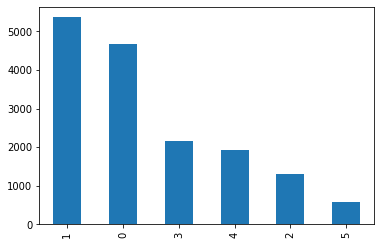

In [6]:
def visualize(df):
  # count frequency of each category
  counts = df['label'].value_counts()
  print(counts)
  # create bar graph/histogram
  counts.plot(kind='bar')

  # display graph
  plt.show()

visualize(df_raw)

# Exercise 2

In [7]:
# Define the stop words
stop_words = set(stopwords.words('english'))

In [8]:
def preprocess(df):
  # Return the list of tokenized tweets. 
  for index, row in df.iterrows():
    sentence = row['text']
    # Tokenize the text into individual words
    tokens = word_tokenize(sentence)
    # Remove the stop words
    tokens = [word for word in tokens if not word.lower() in stop_words]
    # is alp numeric
    tokens= [word for word in tokens if word.isalnum()]
    # Lowercase all the words
    tokens = [word.lower() for word in tokens]

    #tokens = [ps.stem(word) for word in tokens]
    tokens = [lm.lemmatize(word) for word in tokens]
    df.loc[index, 'text'] = " ".join(tokens)
  return df

df_pre = preprocess(df_raw.copy())

 

In [9]:
df_pre

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting table subb...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


In [10]:
# Converting words to vectors using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

features = df_pre['text']
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(features)

In [11]:
vectors

<16000x13456 sparse matrix of type '<class 'numpy.float64'>'
	with 144316 stored elements in Compressed Sparse Row format>

In [12]:
# Split back into train/val dataset and the test dataset
train_val_features, test_features = vectors[:13000], vectors[13000:]

In [13]:
X = train_val_features
y = df_pre['label'][:13000]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=111)

In [14]:
from sklearn.linear_model import LogisticRegression

def LR_model(x_train, y_train, x_val, y_val):
  # Apply logistic regression on the given dataset, and return the predictions in the val dataset.
  # lr_model is the fitted logistic regression model.
  y_pred = []
  lr_model = LogisticRegression(penalty='l2')
  lr_model.fit(X_train, y_train) 
  y_pred = lr_model.predict(X_val) 
  return lr_model, y_pred

In [15]:
lr_model, y_pred = LR_model(X_train, y_train, X_val, y_val) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score

def metrics(y_true, y_pred):
  # y_true are the true labels given, and y_pred are the ones predicted by the model.
  # Show the required metrics for the given predictions.
  print("Accuracy Score: ", accuracy_score(y_true, y_pred))
  # calculate precision, recall, and F1 score for each class
  precision = precision_score(y_true, y_pred, average=None)
  recall = recall_score(y_true, y_pred, average=None)
  f1 = f1_score(y_true, y_pred, average=None) 

  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 score:', f1) 

In [17]:
metrics(y_val, y_pred)

Accuracy Score:  0.8426923076923077
Precision: [0.87349398 0.79397473 0.86577181 0.85910653 0.9015748  0.87234043]
Recall: [0.94033722 0.95221445 0.57333333 0.72886297 0.72239748 0.47674419]
F1 score: [0.90568395 0.86592475 0.68983957 0.78864353 0.80210158 0.61654135]


# Exercise 3 - LSTM


In [18]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_pre['text'])
sequences = tokenizer.texts_to_sequences(df_pre['text'])
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
labels = df_pre['label']
sequences_train, sequences_val, labels_train, labels_val = train_test_split(padded_sequences, labels, test_size=0.20, random_state=111)
def LSTM_m(labels, padded_sequences):
    
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=256, input_length=max_len))
    model.add(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=6, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    model.fit(padded_sequences, labels, batch_size=32, epochs=20)
    
    return model
LSTM_model = LSTM_m(labels_train, sequences_train)


Epoch 1/20
400/400 [==============================] - 51s 106ms/step - loss: 1.6118 - accuracy: 0.3248
Epoch 2/20
400/400 [==============================] - 41s 101ms/step - loss: 1.5002 - accuracy: 0.3409
Epoch 3/20
400/400 [==============================] - 37s 92ms/step - loss: 1.1514 - accuracy: 0.4291
Epoch 4/20
400/400 [==============================] - 37s 93ms/step - loss: 0.9610 - accuracy: 0.4909
Epoch 5/20
400/400 [==============================] - 38s 95ms/step - loss: 0.7274 - accuracy: 0.6048
Epoch 6/20
400/400 [==============================] - 37s 91ms/step - loss: 0.6026 - accuracy: 0.6559
Epoch 7/20
400/400 [==============================] - 38s 95ms/step - loss: 0.5471 - accuracy: 0.6609
Epoch 8/20
400/400 [==============================] - 38s 94ms/step - loss: 0.3311 - accuracy: 0.8377
Epoch 9/20
400/400 [==============================] - 36s 91ms/step - loss: 0.1112 - accuracy: 0.9653
Epoch 10/20
400/400 [==============================] - 38s 95ms/step - loss: 0.0

In [19]:
LSTM_pred = LSTM_model.predict(sequences_val)
LSTM_pred_cleaned = []
for p in LSTM_pred:
    LSTM_pred_cleaned.append(p.argmax())

metrics(labels_val, LSTM_pred_cleaned)

100/100 [==============================] - 2s 16ms/step
Accuracy Score:  0.915625
Precision: [0.9591623  0.93313668 0.79054054 0.91284404 0.90277778 0.79411765]
Recall: [0.95715778 0.92046557 0.88636364 0.92343387 0.84196891 0.82442748]
F1 score: [0.958159   0.92675781 0.83571429 0.91810842 0.87131367 0.80898876]


# Exercise 4 - Transformer (Hugging Face)

In [20]:
!pip3 install -q git+https://github.com/huggingface/transformers.git
# !pip install -q tensorflow==2.1
!pip3 install torch==1.2.0 torchvision==0.4.0 -f
!pip3 install datasets transformers[sentencepiece] sacrebleu
!pip3 install sacremoses
!pip3 install datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-f option requires 1 argument
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━

In [21]:
import transformers
# Importing libraries.
import pandas as pd
from sklearn.model_selection import train_test_split

import datasets

from datasets import load_dataset, load_metric
from datasets import Dataset, DatasetDict
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import AutoTokenizer

import numpy as np
print(transformers.__version__)

4.28.0.dev0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_raw['text'], df_raw['label'], train_size=0.8, test_size=0.2, shuffle=True, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size=0.5, test_size=0.5, shuffle=True, random_state=0)

train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
valid = pd.concat([x_val, y_val], axis=1)

In [23]:
train_dataset = Dataset.from_pandas(train)
train_dataset = train_dataset.remove_columns(["__index_level_0__"])

test_dataset = Dataset.from_pandas(test)
test_dataset = test_dataset.remove_columns(["__index_level_0__"])

valid_dataset = Dataset.from_pandas(valid)
valid_dataset = valid_dataset.remove_columns(["__index_level_0__"])

raw_datasets = DatasetDict({"train":train_dataset, "test":test_dataset, "valid":valid_dataset})
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12800
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
})

In [24]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [25]:
from datasets import load_dataset

imdb = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
def preprocess_function(examples):
    # inputs = [ex for ex in examples['text']]
    # targets = [ex for ex in examples['label']]
    model_inputs = tokenizer(examples['text'], truncation=True)
  
    return model_inputs

  # return tokenizer(examples["text"], truncation=True)

In [27]:
tokenized_dataset = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/12800 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [28]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [29]:
!pip3 install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 7.7 MB/s eta 0:00:00


In [30]:
import evaluate

accuracy = evaluate.load("accuracy")

In [31]:
import numpy as np


def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [32]:
label2id = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5}
id2label = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

In [33]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=6, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

In [34]:
training_args = TrainingArguments(
    output_dir="Twitter_sentiment_analysis",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)

In [35]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [37]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/vickylin21/Twitter_sentiment_analysis into local empty directory.


Download file pytorch_model.bin:   0%|          | 8.00k/255M [00:00<?, ?B/s]

Download file runs/Mar14_15-46-16_9a50145fc58b/1678809197.3384707/events.out.tfevents.1678809197.9a50145fc58b.…

Download file runs/Mar14_13-11-34_44b97699b674/1678799595.1564436/events.out.tfevents.1678799595.44b97699b674.…

Download file runs/Mar14_16-27-40_9a50145fc58b/1678811294.5996392/events.out.tfevents.1678811294.9a50145fc58b.…

Clean file runs/Mar14_15-46-16_9a50145fc58b/1678809197.3384707/events.out.tfevents.1678809197.9a50145fc58b.158…

Clean file runs/Mar14_13-11-34_44b97699b674/1678799595.1564436/events.out.tfevents.1678799595.44b97699b674.396…

Clean file runs/Mar14_16-27-40_9a50145fc58b/1678811294.5996392/events.out.tfevents.1678811294.9a50145fc58b.109…

Download file runs/Mar13_16-47-35_d718c6995cb8/events.out.tfevents.1678726184.d718c6995cb8.6740.0: 100%|######…

Download file runs/Mar13_03-15-20_302d08c11eec/1678677656.3061523/events.out.tfevents.1678677656.302d08c11eec.…

Clean file runs/Mar13_16-47-35_d718c6995cb8/events.out.tfevents.1678726184.d718c6995cb8.6740.0:  11%|#        …

Download file runs/Mar12_14-17-52_d820f79fcc45/1678630797.1790075/events.out.tfevents.1678630797.d820f79fcc45.…

Download file runs/Mar12_09-16-57_6c360a3ee506/1678612885.9123065/events.out.tfevents.1678612885.6c360a3ee506.…

Clean file runs/Mar13_03-15-20_302d08c11eec/1678677656.3061523/events.out.tfevents.1678677656.302d08c11eec.721…

Clean file runs/Mar12_14-17-52_d820f79fcc45/1678630797.1790075/events.out.tfevents.1678630797.d820f79fcc45.684…

Download file runs/Mar12_04-23-22_5b82790f7f9e/1678595200.5498426/events.out.tfevents.1678595200.5b82790f7f9e.…

Clean file runs/Mar12_09-16-57_6c360a3ee506/1678612885.9123065/events.out.tfevents.1678612885.6c360a3ee506.454…

Clean file runs/Mar12_04-23-22_5b82790f7f9e/1678595200.5498426/events.out.tfevents.1678595200.5b82790f7f9e.419…

Download file runs/Mar13_04-52-22_9338c32a660d/1678683253.0005484/events.out.tfevents.1678683253.9338c32a660d.…

Download file runs/Mar13_16-47-35_d718c6995cb8/1678726243.2176864/events.out.tfevents.1678726243.d718c6995cb8.…

Clean file runs/Mar13_04-52-22_9338c32a660d/1678683253.0005484/events.out.tfevents.1678683253.9338c32a660d.678…

Clean file runs/Mar13_16-47-35_d718c6995cb8/1678726243.2176864/events.out.tfevents.1678726243.d718c6995cb8.674…

Download file runs/Mar13_14-26-18_f0cbccae9f8e/events.out.tfevents.1678717614.f0cbccae9f8e.37152.0: 100%|#####…

Clean file runs/Mar13_14-26-18_f0cbccae9f8e/events.out.tfevents.1678717614.f0cbccae9f8e.37152.0:  18%|#8      …

Download file runs/Mar13_14-26-18_f0cbccae9f8e/1678717614.3127234/events.out.tfevents.1678717614.f0cbccae9f8e.…

Download file runs/Mar13_16-47-35_d718c6995cb8/1678726184.9281847/events.out.tfevents.1678726184.d718c6995cb8.…

Clean file runs/Mar13_14-26-18_f0cbccae9f8e/1678717614.3127234/events.out.tfevents.1678717614.f0cbccae9f8e.371…

Download file runs/Mar13_12-15-51_f0cbccae9f8e/1678709847.115333/events.out.tfevents.1678709847.f0cbccae9f8e.1…

Clean file runs/Mar13_16-47-35_d718c6995cb8/1678726184.9281847/events.out.tfevents.1678726184.d718c6995cb8.674…

Clean file runs/Mar13_12-15-51_f0cbccae9f8e/1678709847.115333/events.out.tfevents.1678709847.f0cbccae9f8e.158.…

Download file runs/Mar14_13-11-34_44b97699b674/events.out.tfevents.1678799595.44b97699b674.396.0: 100%|#######…

Clean file runs/Mar14_13-11-34_44b97699b674/events.out.tfevents.1678799595.44b97699b674.396.0:  18%|#8        …

Download file runs/Mar13_06-11-05_9338c32a660d/1678687870.269948/events.out.tfevents.1678687870.9338c32a660d.6…

Clean file runs/Mar13_06-11-05_9338c32a660d/1678687870.269948/events.out.tfevents.1678687870.9338c32a660d.678.…

Download file runs/Mar13_12-15-51_f0cbccae9f8e/events.out.tfevents.1678709847.f0cbccae9f8e.158.0: 100%|#######…

Download file runs/Mar14_15-46-16_9a50145fc58b/events.out.tfevents.1678809197.9a50145fc58b.158.0: 100%|#######…

Clean file runs/Mar13_12-15-51_f0cbccae9f8e/events.out.tfevents.1678709847.f0cbccae9f8e.158.0:  18%|#8        …

Download file runs/Mar13_06-11-05_9338c32a660d/events.out.tfevents.1678687870.9338c32a660d.678.2: 100%|#######…

Clean file runs/Mar14_15-46-16_9a50145fc58b/events.out.tfevents.1678809197.9a50145fc58b.158.0:  18%|#8        …

Download file runs/Mar14_16-27-40_9a50145fc58b/events.out.tfevents.1678811294.9a50145fc58b.10902.0: 100%|#####…

Download file training_args.bin: 100%|##########| 3.50k/3.50k [00:00<?, ?B/s]

Clean file runs/Mar13_06-11-05_9338c32a660d/events.out.tfevents.1678687870.9338c32a660d.678.2:  18%|#8        …

Download file runs/Mar13_04-52-22_9338c32a660d/events.out.tfevents.1678683252.9338c32a660d.678.0: 100%|#######…

Clean file runs/Mar14_16-27-40_9a50145fc58b/events.out.tfevents.1678811294.9a50145fc58b.10902.0:  18%|#8      …

Clean file training_args.bin:  29%|##8       | 1.00k/3.50k [00:00<?, ?B/s]

Clean file runs/Mar13_04-52-22_9338c32a660d/events.out.tfevents.1678683252.9338c32a660d.678.0:  18%|#8        …

Download file runs/Mar13_03-15-20_302d08c11eec/events.out.tfevents.1678677656.302d08c11eec.721.0: 100%|#######…

Clean file runs/Mar13_03-15-20_302d08c11eec/events.out.tfevents.1678677656.302d08c11eec.721.0:  18%|#8        …

Download file runs/Mar12_14-17-52_d820f79fcc45/events.out.tfevents.1678630797.d820f79fcc45.6845.0: 100%|######…

Download file runs/Mar12_09-16-57_6c360a3ee506/events.out.tfevents.1678612885.6c360a3ee506.454.0: 100%|#######…

Clean file runs/Mar12_14-17-52_d820f79fcc45/events.out.tfevents.1678630797.d820f79fcc45.6845.0:  18%|#8       …

Clean file runs/Mar12_09-16-57_6c360a3ee506/events.out.tfevents.1678612885.6c360a3ee506.454.0:  18%|#8        …

Download file runs/Mar12_04-23-22_5b82790f7f9e/events.out.tfevents.1678595200.5b82790f7f9e.419.0: 100%|#######…

Clean file runs/Mar12_04-23-22_5b82790f7f9e/events.out.tfevents.1678595200.5b82790f7f9e.419.0:  18%|#8        …

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

In [38]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.725900,0.233559,0.920000
2,0.154200,0.189145,0.927500


TrainOutput(global_step=1600, training_loss=0.3524476706981659, metrics={'train_runtime': 189.9377, 'train_samples_per_second': 134.781, 'train_steps_per_second': 8.424, 'total_flos': 311469629554944.0, 'train_loss': 0.3524476706981659, 'epoch': 2.0})

In [39]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

Upload file runs/Mar15_13-50-48_2404a52362cb/events.out.tfevents.1678888345.2404a52362cb.429.0: 100%|#########…

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/vickylin21/Twitter_sentiment_analysis
   20eef9b..bd907e0  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/vickylin21/Twitter_sentiment_analysis
   20eef9b..bd907e0  main -> main

To https://huggingface.co/vickylin21/Twitter_sentiment_analysis
   bd907e0..11171fe  main -> main

   bd907e0..11171fe  main -> main



'https://huggingface.co/vickylin21/Twitter_sentiment_analysis/commit/bd907e038ba47d9861eda770819acdfc70111041'

In [40]:
list_x_test = x_test.tolist()
list_y_test = y_test.tolist()

In [41]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="Josh98/Twitter_sentiment_analysis")


In [42]:
predicted = [ label2id[x['label']] for x in classifier(list_x_test) ]

In [43]:
metrics(list_y_test, predicted)

Accuracy Score:  0.896875
Precision: [0.93176972 0.90135397 0.825      0.87822878 0.90361446 0.78947368]
Recall: [0.94588745 0.90135397 0.76153846 0.94444444 0.81081081 0.83333333]
F1 score: [0.93877551 0.90135397 0.792      0.91013384 0.85470085 0.81081081]


# Exercise 8

In [ ]:
#In the report

# Exercise 9

In [44]:
count = 0
for i in range(len(list_y_test)):
    if list_y_test[i] != predicted[i]:
        print("Tweet: " + list_x_test[i])
        print("True Emotion: " + str(id2label[list_y_test[i]]))
        print("Predicted Emotion: " + str(id2label[predicted[i]]))
        print('\n')
        count += 1
    if count == 3:
        break

Tweet: i feel that the leader i admired is being selfish
True Emotion: love
Predicted Emotion: anger


Tweet: i could feel ediths meanness could feel stoners withdrawal and the cool pity of their friends
True Emotion: joy
Predicted Emotion: love


Tweet: i suck a lot at keeping the house clean and yet feel twitchy when its messy
True Emotion: sadness
Predicted Emotion: anger




# Exercise 10

In [45]:
import csv
df_2 = load_csv("Kaggle2_Dataset.csv")

In [46]:
predicted_kaggle2 = [x['label'] for x in classifier(df_2['text'].tolist())]

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import json
import gensim
from gensim.models import KeyedVectors
import gensim.downloader

glove_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')

possible_emotions = df_2['possible_emotions']
pred_labels = []

for i in range(df_2.shape[0]):
    most_similar = None
    highest = -1
    for emotion in eval(possible_emotions[i]):
        if(emotion in glove_vectors.vocab):
            similarity = glove_vectors.similarity(predicted_kaggle2[i], emotion)
            if highest < similarity:
                most_similar = emotion
                highest = similarity

    pred_labels.append(most_similar)


[==================================================] 100.0% 958.5/958.4MB downloaded


# Kaggle submission


In [49]:
kag_test = load_csv("Kaggle1_Dataset.csv")['text'].tolist()


### Part 1

In [50]:
# Using transformer
predicted = [ label2id[x['label']] for x in classifier(kag_test) ]

In [51]:
import numpy
 
final = [] 
for i in range(len(predicted)):
  final.append([i, predicted[i]])

out = pd.DataFrame(numpy.array(final), columns = ['index', 'labels'])
out.to_csv('res.csv', index=False)

### Part 2


In [52]:
df_k2 = pd.DataFrame({'labels': pred_labels})
df_k2.to_csv("output.csv", index_label='index')